In [405]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

**************Note: ก่อน Display ภาพ Convert BGR to RGB ก่อน**********

Pattel noise

In [406]:
def notched_rejected(shape,d0,u_k,v_k):
    M,N=shape
    H=np.zeros((M,N))

    for u in range(0,M):
        for v in range(0,N):

            D_uv=np.sqrt((u-M/2+u_k)**2+(v-N/2+v_k)**2)
            D_muv=np.sqrt((u-M/2-u_k)**2+(v-N/2-v_k)**2)

            if(D_uv< d0 or D_muv < d0):
                H[u,v]=0.0
            else:
                H[u,v]=1.0
    return H

(1013, 1348, 3)
(1013, 1348)


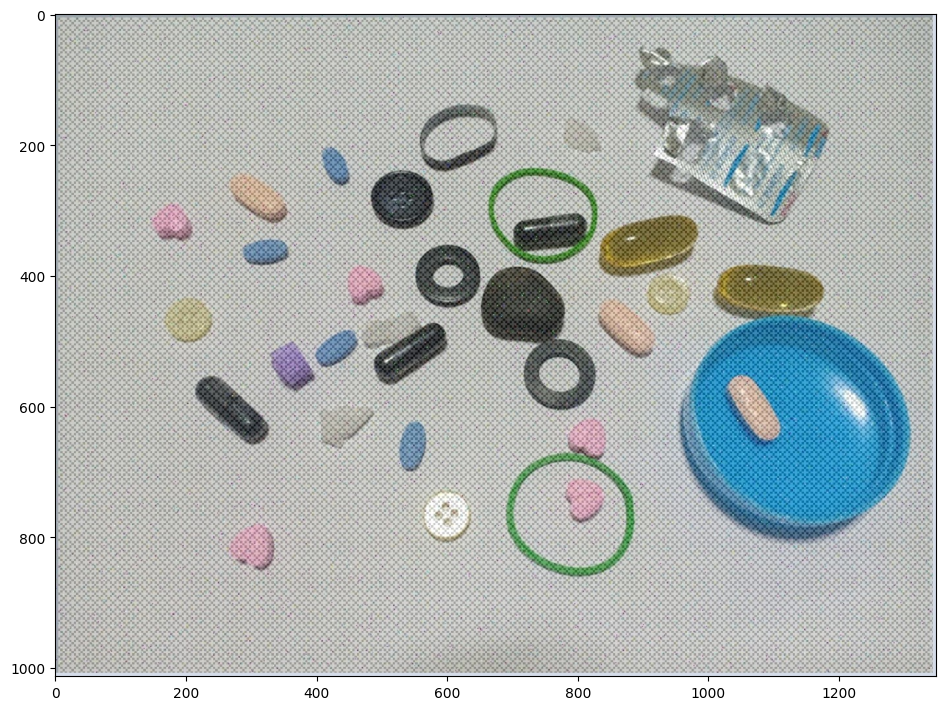

In [407]:
ori_img=cv.imread("medicine_with_noise_mid.jpg")
img_rgb=cv.cvtColor(ori_img,cv.COLOR_BGR2RGB)


# r=img_rgb[:,:,0]
# g=img_rgb[:,:,1]
# b=img_rgb[:,:,2]
r,g,b=cv.split(img_rgb)

print(img_rgb.shape)
print(r.shape)


fig=plt.figure(figsize=(25,25))
plt.subplot(221)
plt.imshow(img_rgb)

# plt.subplot(222)
# plt.imshow(cv.cvtColor(r,cv.COLOR_BGR2RGB))

# plt.subplot(223)
# plt.imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))

# plt.subplot(224)
# plt.imshow(cv.cvtColor(b,cv.COLOR_BGR2RGB))

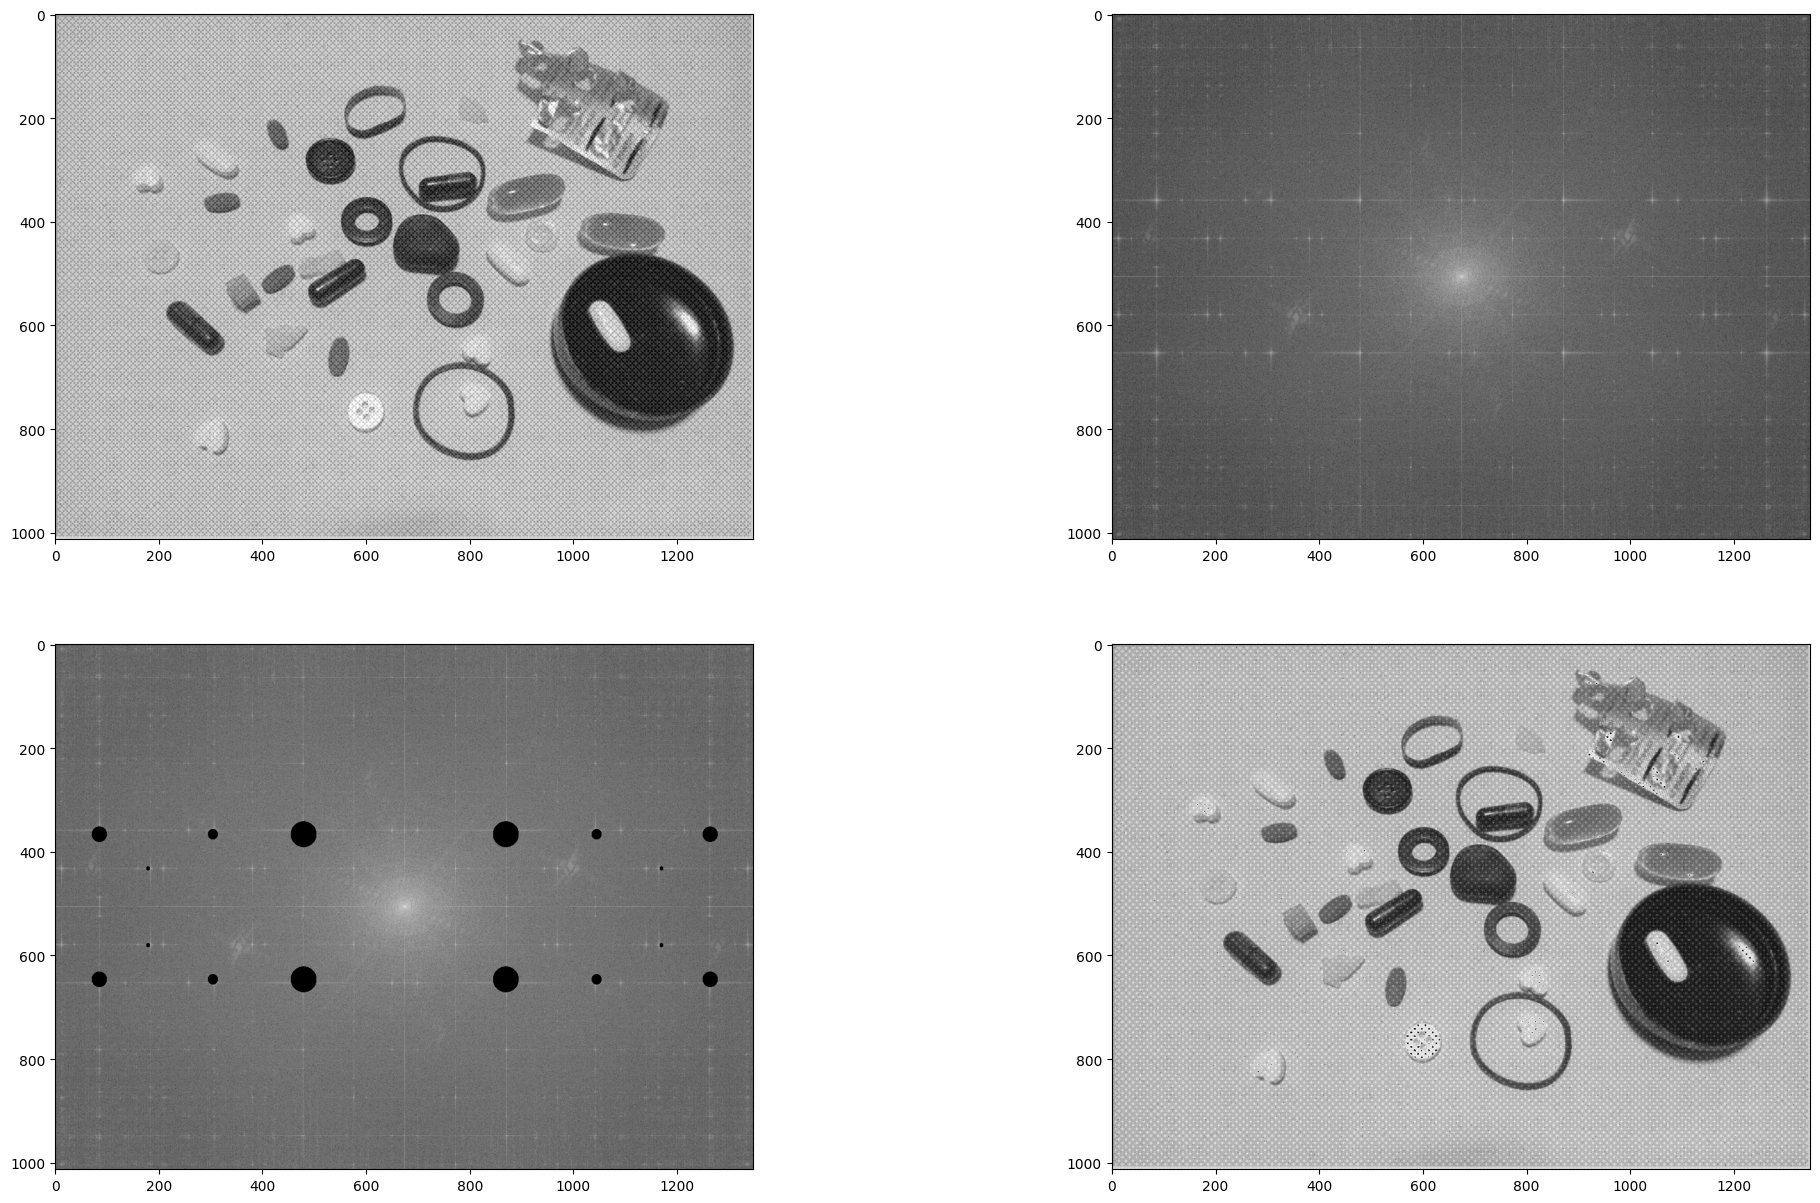

In [408]:
f_Red=np.fft.fft2(r)
fshift_Red=np.fft.fftshift(f_Red)
magnitude_spt_Red=20*np.log(abs(fshift_Red))
##########################################
R_shape=r.shape

H1_R=notched_rejected(R_shape,25,140,195)
H2_R=notched_rejected(R_shape,25,-140,195)
H3_R=notched_rejected(R_shape,10,140,370)
H4_R=notched_rejected(R_shape,10,-140,370)
H5_R=notched_rejected(R_shape,15,140,589)
H6_R=notched_rejected(R_shape,15,-140,589)
H7_R=notched_rejected(R_shape,4,74,495)
H8_R=notched_rejected(R_shape,4,-74,495)


notched_filter_Red=H1_R*H2_R*H3_R*H4_R*H5_R*H6_R*H7_R*H8_R
notched_rejected_center_Red=fshift_Red*notched_filter_Red
notch_re_Red=np.fft.ifftshift(notched_rejected_center_Red)


inverse_notch_Red=np.fft.ifft2(notch_re_Red)
result_R = np.abs(inverse_notch_Red).astype(np.uint8)

###########################################
fig=plt.figure(figsize=(25,15))
plt.subplot(221)
plt.imshow(cv.cvtColor(r,cv.COLOR_BGR2RGB),'gray')


plt.subplot(222)
plt.imshow(magnitude_spt_Red,'gray')


plt.subplot(223)
plt.imshow(magnitude_spt_Red*notched_filter_Red,'gray')


plt.subplot(224)
plt.imshow(result_R,'gray')



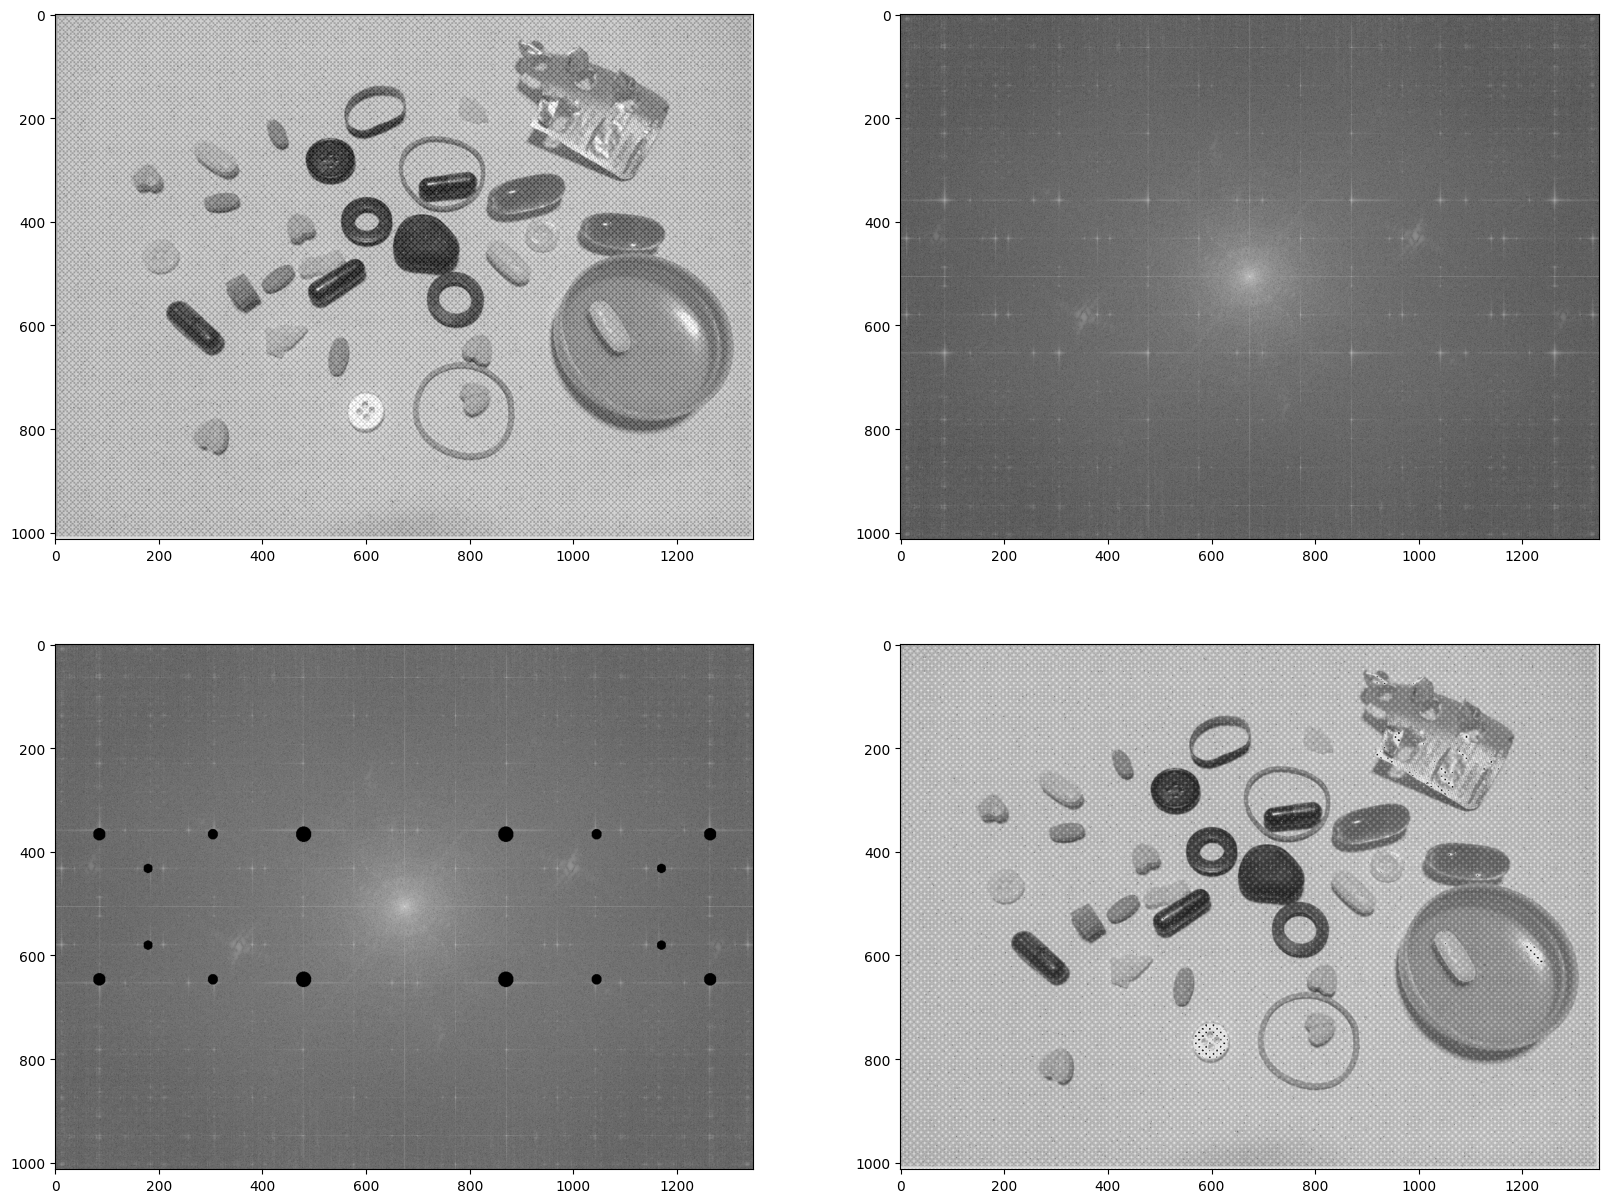

In [409]:
f_Green=np.fft.fft2(g)
fshift_Green=np.fft.fftshift(f_Green)
magnitude_spt_Green=20*np.log(abs(fshift_Green))
##########################################
G_shape=g.shape

H1_G=notched_rejected(G_shape,15,140,195)
H2_G=notched_rejected(G_shape,15,-140,195)
H3_G=notched_rejected(G_shape,10,140,370)
H4_G=notched_rejected(G_shape,10,-140,370)
H5_G=notched_rejected(G_shape,12,140,589)
H6_G=notched_rejected(G_shape,12,-140,589)
H7_G=notched_rejected(G_shape,9,74,495)
H8_G=notched_rejected(G_shape,9,-74,495)




notched_filter_Green=H1_G*H2_G*H3_G*H4_G*H5_G*H6_G*H7_G*H8_G
notched_rejected_center_Green=fshift_Green*notched_filter_Green
notch_re_Green=np.fft.ifftshift(notched_rejected_center_Green)

inverse_notch_Green=np.fft.ifft2(notch_re_Green)
result_G = np.abs(inverse_notch_Green).astype(np.uint8)

###########################################
fig=plt.figure(figsize=(20,15))
plt.subplot(221)
plt.imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))


plt.subplot(222)
plt.imshow(magnitude_spt_Green,'gray')


plt.subplot(223)
plt.imshow(magnitude_spt_Green*notched_filter_Green,'gray')


plt.subplot(224)
plt.imshow(result_G,'gray')



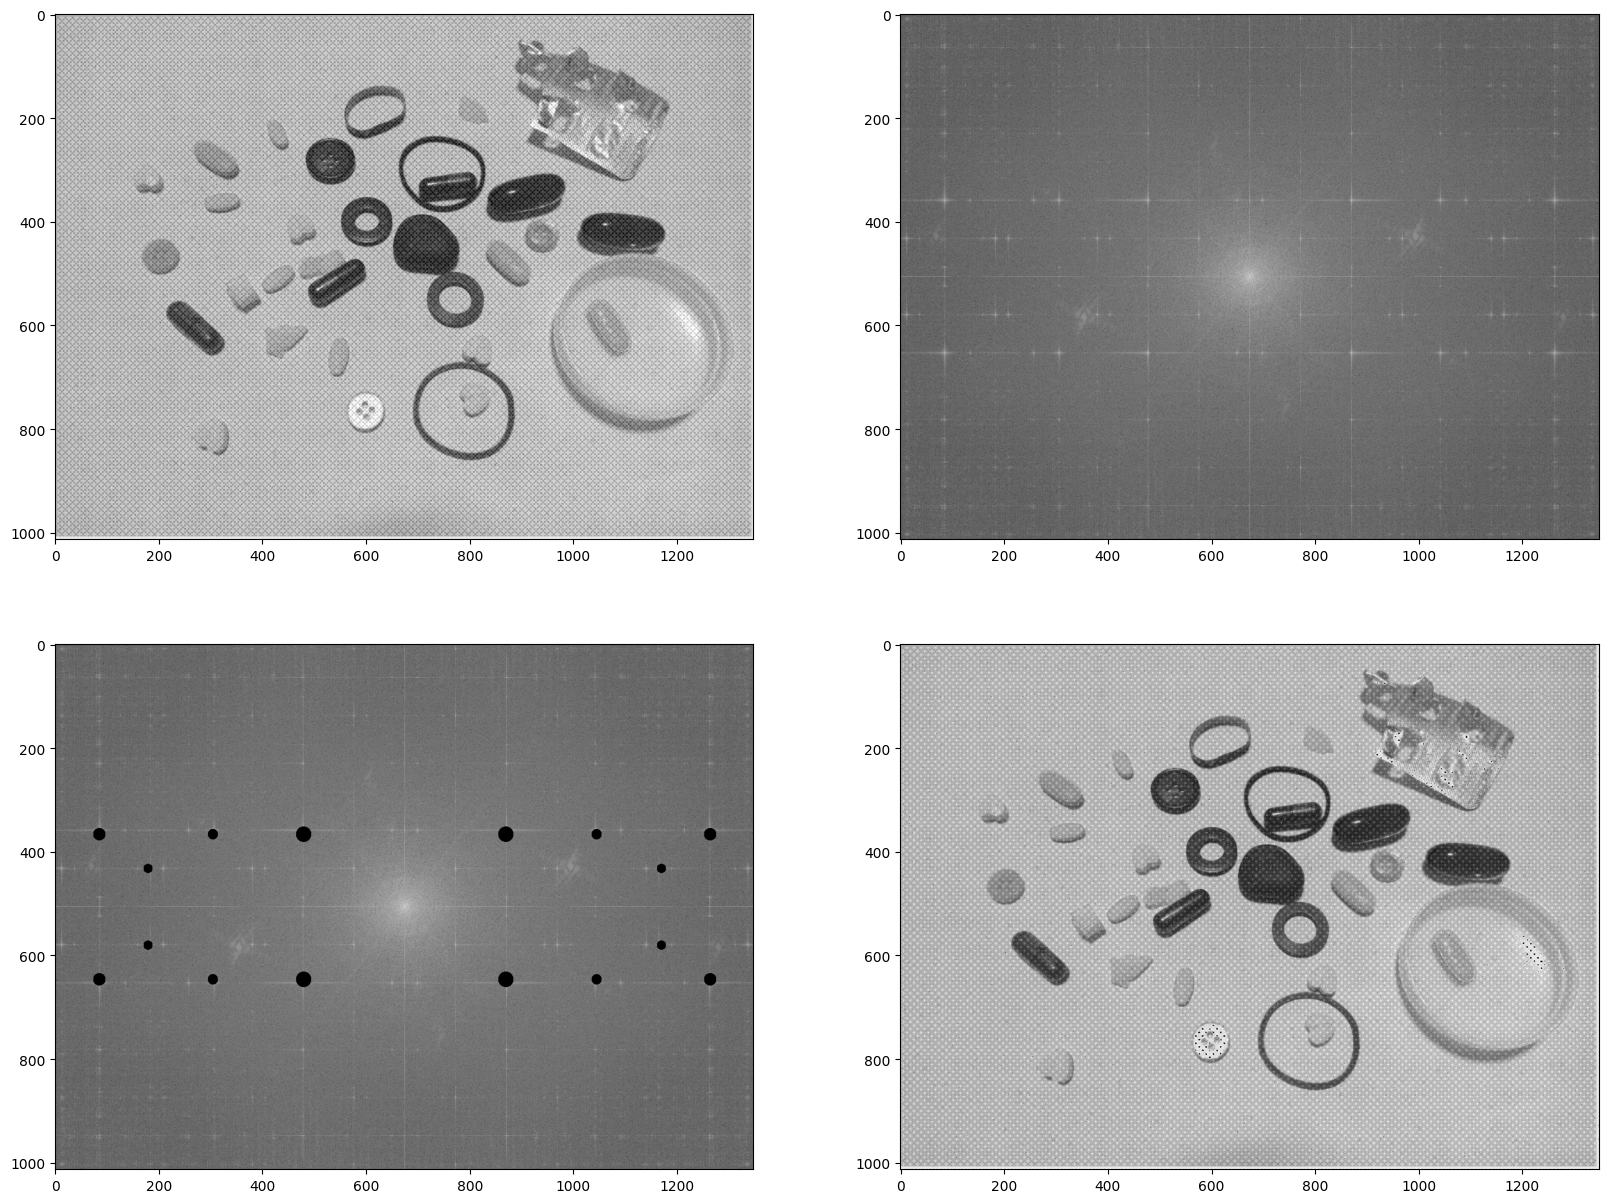

In [410]:
f_Blue=np.fft.fft2(b)
fshift_Blue=np.fft.fftshift(f_Blue)
magnitude_spt_Blue=20*np.log(abs(fshift_Blue))
##########################################
B_shape=b.shape

H1_B=notched_rejected(B_shape,15,140,195)
H2_B=notched_rejected(B_shape,15,-140,195)
H3_B=notched_rejected(B_shape,10,140,370)
H4_B=notched_rejected(B_shape,10,-140,370)
H5_B=notched_rejected(B_shape,12,140,589)
H6_B=notched_rejected(B_shape,12,-140,589)
H7_B=notched_rejected(B_shape,9,74,495)
H8_B=notched_rejected(B_shape,9,-74,495)




notched_filter_Blue=H1_B*H2_B*H3_B*H4_B*H5_B*H6_B*H7_B*H8_B
notched_rejected_center_Blue=fshift_Blue*notched_filter_Blue
notch_re_Blue=np.fft.ifftshift(notched_rejected_center_Blue)

inverse_notch_Blue=np.fft.ifft2(notch_re_Blue)
result_B = np.abs(inverse_notch_Blue).astype(np.uint8)

###########################################
fig=plt.figure(figsize=(20,15))
plt.subplot(221)
plt.imshow(cv.cvtColor(b,cv.COLOR_BGR2RGB),'gray')


plt.subplot(222)
plt.imshow(magnitude_spt_Blue,'gray')


plt.subplot(223)
plt.imshow(magnitude_spt_Blue*notched_filter_Blue,'gray')


plt.subplot(224)
plt.imshow(result_B,'gray')



True

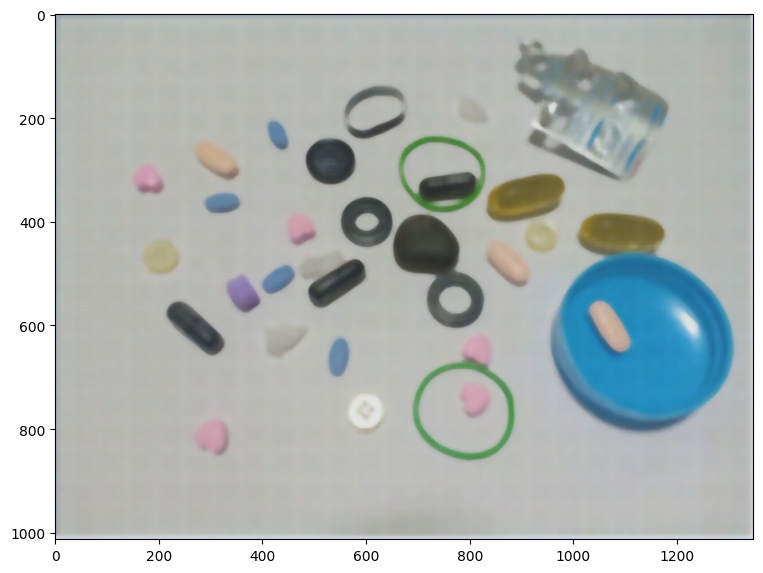

In [411]:
merge_img=cv.merge((result_R,result_G,result_B))
bg_img=np.ones((1013,1348,3),dtype=np.uint8)*200
# img=cv.cvtColor(merge_img,cv.COLOR_RGB2BGR)
blur_img= cv.medianBlur(merge_img,15)

fig=plt.figure(figsize=(20,15))
# plt.subplot(221)
# plt.imshow(img_rgb)

# plt.subplot(222)
# plt.imshow(merge_img)

plt.subplot(221)
plt.imshow(blur_img)
cv.imwrite("mediBlue_Finish.jpg",cv.cvtColor(blur_img,cv.COLOR_BGR2RGB))

HSV inRange

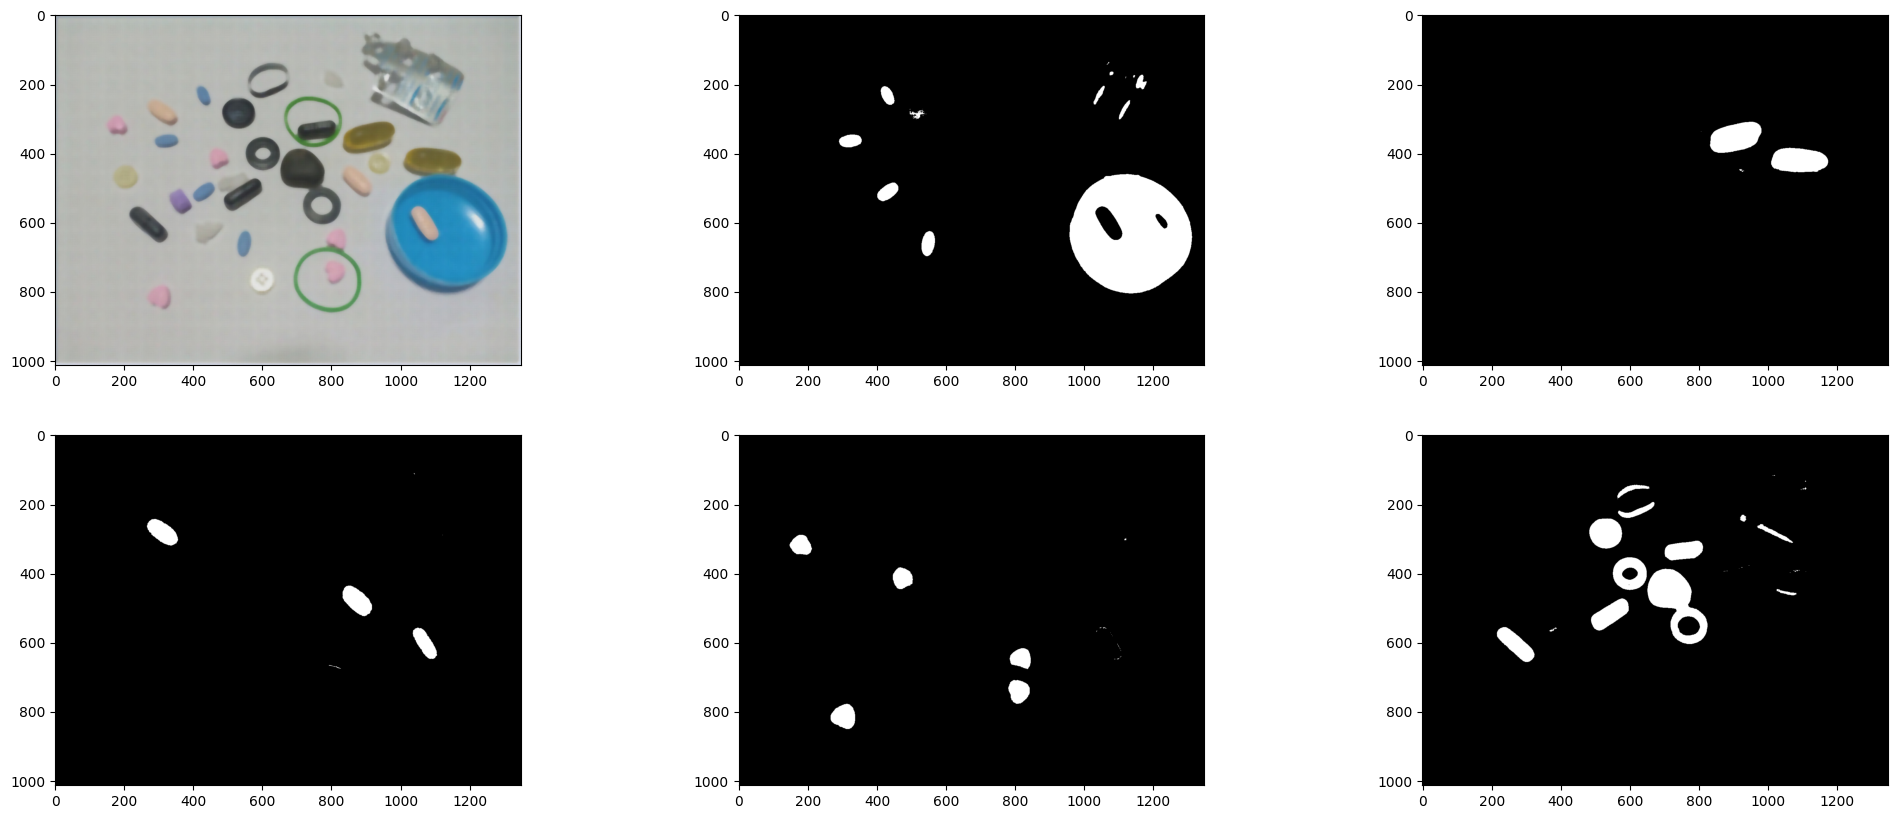

In [412]:
fins_img = cv.imread("mediBlue_Finish.jpg")
# img = cv.cvtColor(ori_img, cv.COLOR_BGR2RGB)
img_hsv=cv.cvtColor(fins_img, cv.COLOR_BGR2HSV)


#################- Blue
upper_blue=np.array([120,255,255])
lower_blue=np.array([90,50,50])
mask_blue=cv.inRange(img_hsv,lower_blue,upper_blue)
mask_indices_blue=np.where(mask_blue==255)
#################

################# - Yellow_
upper_yellow=np.array([45,255,255])
lower_yellow=np.array([20,75,75])
mask_yellow=cv.inRange(img_hsv,lower_yellow,upper_yellow)
mask_indices_yellow=np.where(mask_yellow==255)
#################

################# - pastel orange
upper_orange=np.array([17,255,255]) #172,130,98
lower_orange=np.array([1,27,27]) #200,172,151
mask_orange=cv.inRange(img_hsv,lower_orange,upper_orange)
mask_indices_orange=np.where(mask_orange==255)
##################


################# - pink pastel
upper_pink=np.array([180,250,250]) 
lower_pink=np.array([150,20,20]) 
mask_pink=cv.inRange(img_hsv,lower_pink,upper_pink)
mask_indices_pink=np.where(mask_pink==255)
#################


################# - black pastel
upper_black=np.array([255,111,111]) 
lower_black=np.array([0,0,0]) 
mask_black=cv.inRange(img_hsv,lower_black,upper_black)
mask_indices_black=np.where(mask_black==255)
#################


fig=plt.figure(figsize=(25,10))

plt.subplot(231)
plt.imshow(cv.cvtColor(fins_img,cv.COLOR_BGR2RGB))

plt.subplot(232)
plt.imshow(cv.cvtColor(mask_blue,cv.COLOR_BGR2RGB))

plt.subplot(233)
plt.imshow(cv.cvtColor(mask_yellow,cv.COLOR_BGR2RGB))

plt.subplot(234)
plt.imshow(cv.cvtColor(mask_orange,cv.COLOR_BGR2RGB))

plt.subplot(235)
plt.imshow(cv.cvtColor(mask_pink,cv.COLOR_BGR2RGB))

plt.subplot(236)
plt.imshow(cv.cvtColor(mask_black,cv.COLOR_BGR2RGB))

Set mask_color

In [413]:
mask_blue_1 = np.zeros((1013,1348),dtype=np.uint8)
mask_blue_2 = np.zeros((1013,1348),dtype=np.uint8)
mask_blue_3 = np.zeros((1013,1348),dtype=np.uint8)
mask_blue_4 = np.zeros((1013,1348),dtype=np.uint8)


mask_yellow_1 = np.zeros((1013,1348),dtype=np.uint8)
mask_yellow_2 = np.zeros((1013,1348),dtype=np.uint8)

mask_orange_1 = np.zeros((1013,1348),dtype=np.uint8)
mask_orange_2 = np.zeros((1013,1348),dtype=np.uint8)
mask_orange_3 = np.zeros((1013,1348),dtype=np.uint8)

mask_pink_1 = np.zeros((1013,1348),dtype=np.uint8)
mask_pink_2 = np.zeros((1013,1348),dtype=np.uint8)
mask_pink_3 = np.zeros((1013,1348),dtype=np.uint8)
mask_pink_4 = np.zeros((1013,1348),dtype=np.uint8)
mask_pink_5 = np.zeros((1013,1348),dtype=np.uint8)

mask_black_1 = np.zeros((1013,1348),dtype=np.uint8)
mask_black_2 = np.zeros((1013,1348),dtype=np.uint8)
mask_black_3 = np.zeros((1013,1348),dtype=np.uint8)

Med Blue

In [414]:
move_blue, order_blue=cv.findContours(mask_blue, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for blue in range(len(move_blue)) :
    bound_blue=cv.contourArea(move_blue[blue])
#     print(bound_blue)
    if bound_blue == 1855.0:
         cv.drawContours(mask_blue_1, move_blue, blue, (255, 255, 255), -1)
    if bound_blue == 1418.0:
         cv.drawContours(mask_blue_2, move_blue, blue, (255, 255, 255), -1)
    if bound_blue == 2104.0:
         cv.drawContours(mask_blue_3, move_blue, blue, (255, 255, 255), -1)
    if bound_blue == 2069.5:
         cv.drawContours(mask_blue_4, move_blue, blue, (255, 255, 255), -1)

Med Yellow 

In [415]:
move_yellow, order_yellow=cv.findContours(mask_yellow, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for yellow in range(len(move_yellow)) :
    bound_yellow=cv.contourArea(move_yellow[yellow])
#     print(bound_yellow)
    if bound_yellow == 9330.0:
         cv.drawContours(mask_yellow_1, move_yellow, yellow, (255, 255, 255), -1)
    if bound_yellow == 9839.5:
         cv.drawContours(mask_yellow_2, move_yellow, yellow, (255, 255, 255), -1)

Med Orange

In [416]:
move_orange, order_orange=cv.findContours(mask_orange, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for orange in range(len(move_orange)) :
    bound_orange=cv.contourArea(move_orange[orange])
#     print(bound_orange)
    if bound_orange == 3327.5 :
         cv.drawContours(mask_orange_1, move_orange, orange, (255, 255, 255), -1)
    if bound_orange == 4607.5 :
         cv.drawContours(mask_orange_2, move_orange, orange, (255, 255, 255), -1)
    if bound_orange == 4125.0 :
         cv.drawContours(mask_orange_3, move_orange, orange, (255, 255, 255), -1)

Med Pink

In [417]:
move_pink, order_pink=cv.findContours(mask_pink, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for pink in range(len(move_pink)) :
    bound_pink=cv.contourArea(move_pink[pink])
#     print(bound_pink)
    if bound_pink == 3769.5 :
         cv.drawContours(mask_pink_1, move_pink, pink, (255, 255, 255), -1)
    if bound_pink == 3124.0 :
         cv.drawContours(mask_pink_2, move_pink, pink, (255, 255, 255), -1)
    if bound_pink == 2642.0 :
         cv.drawContours(mask_pink_3, move_pink, pink, (255, 255, 255), -1)
    if bound_pink == 2657.0 :
         cv.drawContours(mask_pink_4, move_pink, pink, (255, 255, 255), -1)
    if bound_pink == 2646.0 :
         cv.drawContours(mask_pink_5, move_pink, pink, (255, 255, 255), -1)

Med Black

In [426]:
move_black, order_black=cv.findContours(mask_black, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for black in range(len(move_black)) :
    bound_black=cv.contourArea(move_black[black])
#     print(bound_black)
    if bound_black == 5183.5 :
         cv.drawContours(mask_black_1, move_black,black, (255, 255, 255), -1)
    if bound_black == 4730.0 :
         cv.drawContours(mask_black_2, move_black, black, (255, 255, 255), -1)
    if bound_black == 5458.0 :
         cv.drawContours(mask_black_3, move_black, black, (255, 255, 255), -1)


In [419]:
blue_out_1=np.where(mask_blue_1==255)
blue_out_2=np.where(mask_blue_2==255)
blue_out_3=np.where(mask_blue_3==255)
blue_out_4=np.where(mask_blue_4==255)

yellow_out_1=np.where(mask_yellow_1==255)
yellow_out_2=np.where(mask_yellow_2==255)

orange_out_1=np.where(mask_orange_1==255)
orange_out_2=np.where(mask_orange_2==255)
orange_out_3=np.where(mask_orange_3==255)

pink_out_1=np.where(mask_pink_1==255)
pink_out_2=np.where(mask_pink_2==255)
pink_out_3=np.where(mask_pink_3==255)
pink_out_4=np.where(mask_pink_4==255)
pink_out_5=np.where(mask_pink_5==255)

black_out_1=np.where(mask_black_1==255)
black_out_2=np.where(mask_black_2==255)
black_out_3=np.where(mask_black_3==255)




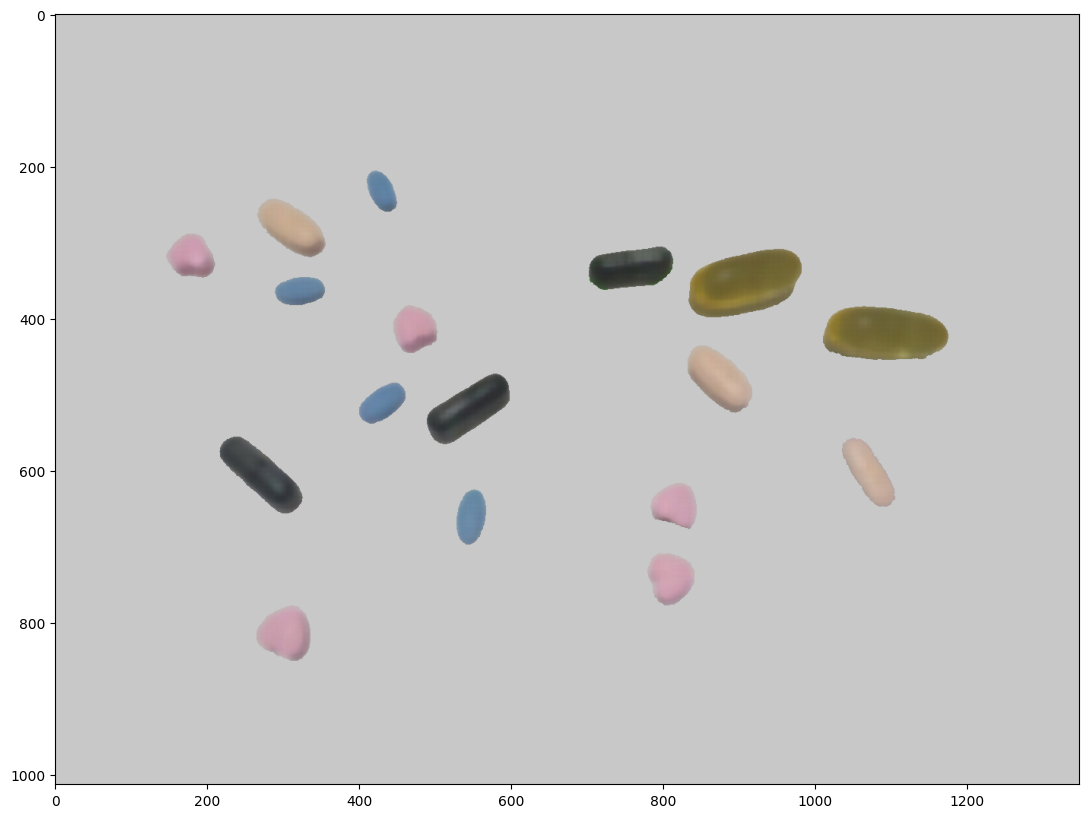

In [427]:
bg_img[blue_out_1]=fins_img[blue_out_1]
bg_img[blue_out_2]=fins_img[blue_out_2]
bg_img[blue_out_3]=fins_img[blue_out_3]
bg_img[blue_out_4]=fins_img[blue_out_4]

bg_img[yellow_out_1]=fins_img[yellow_out_1]
bg_img[yellow_out_2]=fins_img[yellow_out_2]

bg_img[orange_out_1]=fins_img[orange_out_1]
bg_img[orange_out_2]=fins_img[orange_out_2]
bg_img[orange_out_3]=fins_img[orange_out_3]

bg_img[pink_out_1]=fins_img[pink_out_1]
bg_img[pink_out_2]=fins_img[pink_out_2]
bg_img[pink_out_3]=fins_img[pink_out_3]
bg_img[pink_out_4]=fins_img[pink_out_4]
bg_img[pink_out_5]=fins_img[pink_out_5]

bg_img[black_out_1]=fins_img[black_out_1]
bg_img[black_out_2]=fins_img[black_out_2]
bg_img[black_out_3]=fins_img[black_out_3]

fig=plt.figure(figsize=(25,10))
output_img=cv.cvtColor(bg_img,cv.COLOR_BGR2RGB)


plt.imshow(output_img)


In [421]:
# # fins_img[mask_indices_blue[0],mask_indices_blue[1]-1080] = fins_img[mask_indices_blue]

# bg_img[mask_indices_blue]=fins_img[mask_indices_blue] # med_blue
# # bg_img[mask_indices_yellow]=fins_img[mask_indices_yellow] # med_yellow 
# # bg_img[mask_indices_orange]=fins_img[mask_indices_orange] # med_orange
# # bg_img[mask_indices_pink]=fins_img[mask_indices_pink] # med_pink
# # bg_img[mask_indices_black]=fins_img[mask_indices_black] # med_black 





# print("Print Original shape: ",fins_img.shape)
# print("Print bg shape: ",bg_img.shape)


# fig=plt.figure(figsize=(25,15))

# plt.subplot(231)
# # plt.imshow(cv.cvtColor(fins_img,cv.COLOR_RGB2BGR))

# # plt.subplot(232)
# plt.imshow(cv.cvtColor(bg_img,cv.COLOR_RGB2BGR))




In [422]:
# img = cv.imread('mediBlue_Finish.jpg')
# fig=plt.figure(figsize=(20,10))

# mask = np.zeros(img.shape[:2],np.uint8)

# bgdModel = np.zeros((1,65),np.float64)
# fgdModel = np.zeros((1,65),np.float64)
# rect = (300,250,1001,1098) #x,y,w,h
 
# cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
# mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# img = img*mask2[:,:,np.newaxis]
# plt.imshow(img),plt.colorbar(),plt.show()

In [423]:
# # newmask is the mask image I manually labelled
# newmask = cv.imread('newmask.png',0)
# newmask = cv.resize(newmask,(1348,1013),interpolation=cv.INTER_AREA)
# fig=plt.figure(figsize=(20,10))
# # wherever it is marked white (sure foreground), change mask=1
# # wherever it is marked black (sure background), change mask=0
# mask[newmask == 0] = 0
# mask[newmask == 255] = 1
# mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
# mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# img_output = img*mask[:,:,np.newaxis].astype('uint8')
# plt.imshow(img_output),plt.colorbar(),plt.show()

In [424]:
# print(newmask.shape)
# print(img.shape)